<a href="https://colab.research.google.com/github/zakir0741/Ai-DS-Project/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Saved as  'stock_price_data.csv' with 1000 rows and 5 columns
   previous_close        volume  market_sentiment  days_since_ipo        price
0      593.083172  1.007151e+06         -0.476589             892   577.436834
1     1428.535744  2.755315e+06         -0.506042            4418  1427.454772
2     1111.391216  4.377435e+06          0.812509            4078  1139.233091
3      918.054802  3.687902e+06         -0.500908            4945   912.229870
4      276.227029  4.052150e+06         -0.456101            2576   264.208059

Missing Values:
 previous_close      0
volume              0
market_sentiment    0
days_since_ipo      0
price               0
dtype: int64


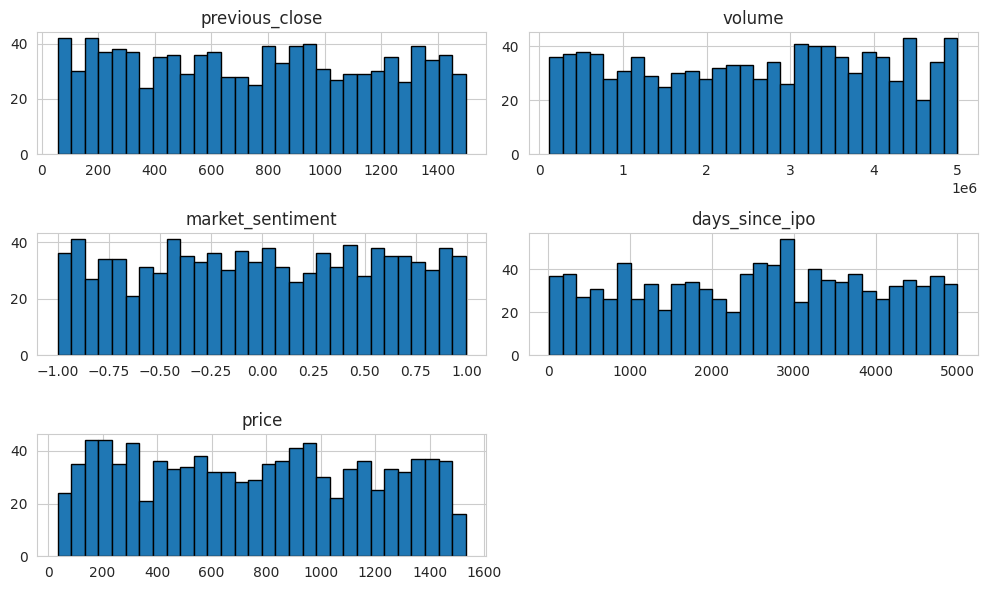

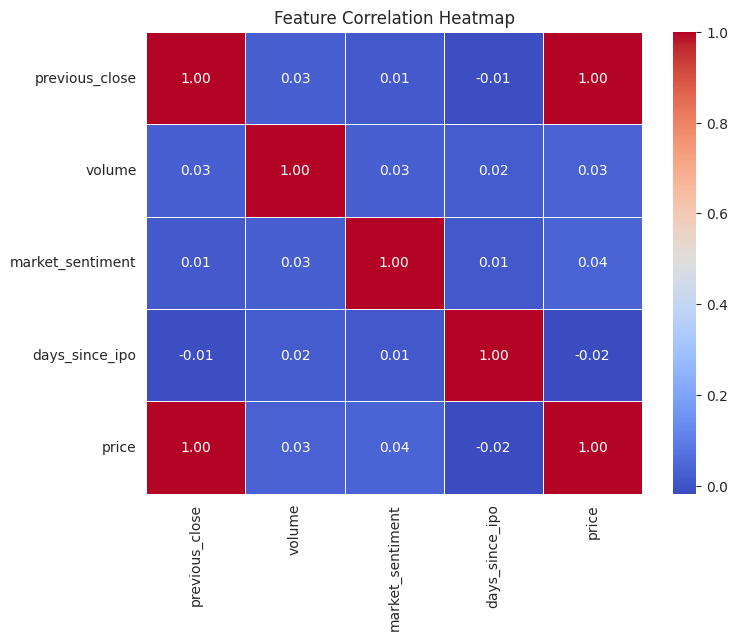

Mean Absolute Error: 7.62
R-squared: 1.00


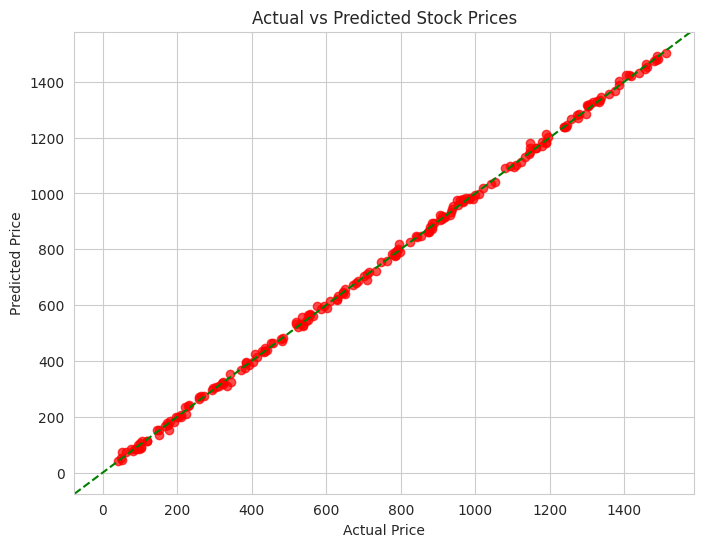

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

num_samples = 1000
previous_close = np.random.uniform(50, 1500, num_samples)
volume = np.random.uniform(1e5, 5e6, num_samples)
market_sentiment = np.random.uniform(-1, 1, num_samples)
days_since_ipo = np.random.randint(10, 5000, num_samples)

price = (previous_close * 1.01 +
         (volume / 1e6) * 0.5 +
         market_sentiment * 20 -
         (days_since_ipo / 1000) * 2 +
         np.random.normal(0, 10, num_samples))

df = pd.DataFrame({
    "previous_close": previous_close,
    "volume": volume,
    "market_sentiment": market_sentiment,
    "days_since_ipo": days_since_ipo,
    "price": price
})

csv_filename = "stock_price_data.csv"
df.to_csv(csv_filename, index=False)
print(f"Dataset Saved as  '{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns")

df = pd.read_csv("stock_price_data.csv")
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

df.hist(figsize=(10, 6), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df[["previous_close", "volume", "market_sentiment", "days_since_ipo"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Stock Prices")
plt.axline([0, 0], slope=1, color="green", linestyle="--")
plt.show()